In [28]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

# for plotting
import plotly
plotly.tools.set_credentials_file(username="majidpy", api_key="rW7nc9CHax4Z6NugEDvT")
import plotly.graph_objs as go
import plotly.plotly as py
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
"""
Plotting some sample images
"""

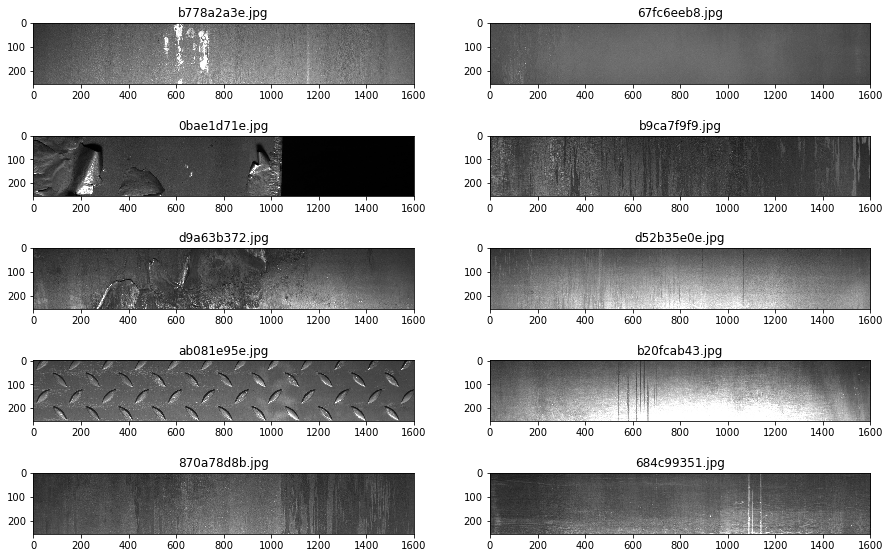

In [49]:
img_list = os.listdir('./train_image')
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('xkcd:white')
np.random.seed(42)
for (i, j) in zip(np.random.randint(0, len(img_list), size=10), range(10)) :
    img = plt.imread('./train_image/'+ img_list[i])
    a = fig.add_subplot(5, 2, j+1)
    plt.imshow(img)
    a.set_title(img_list[i])

In [ ]:
"""
Defects in sample images? Since there are 4 types of defects, we will seperate them. 
It makes sense to seperate these defects and train them seperately.
"""

In [64]:
train_pd = pd.read_csv('train.csv')
imageid = [t[:-2] for t in train_pd['ImageId_ClassId'].values]
classid = [int(t[-1:]) for t in train_pd['ImageId_ClassId'].values]
train_pd['ImageId'] = imageid
train_pd['ClassId'] = classid
train_pd.drop(columns='ImageId_ClassId', inplace=True)

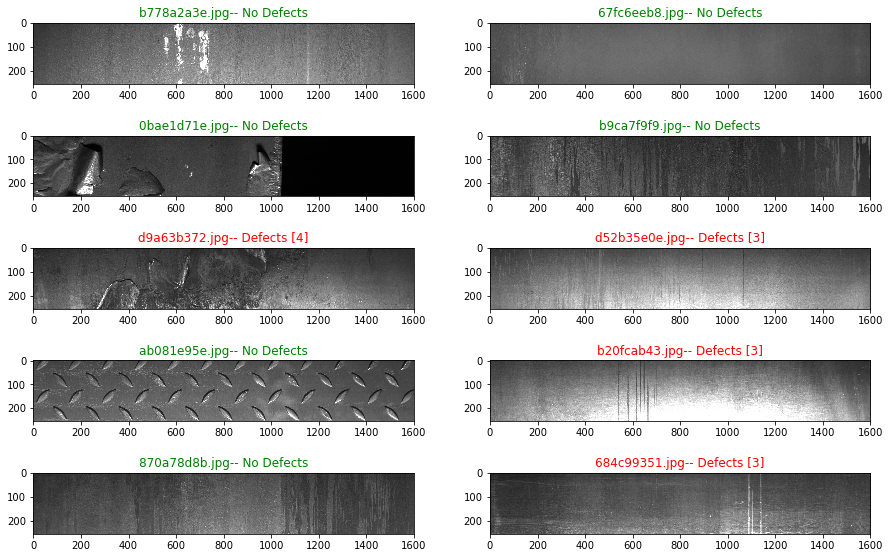

In [87]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('xkcd:white')
np.random.seed(42)
for (i, j) in zip(np.random.randint(0, len(img_list), size=10), range(10)) :
    img = plt.imread('./train_image/'+ img_list[i])
    a = fig.add_subplot(5, 2, j+1)
    plt.imshow(img)
    temp_ = train_pd.loc[train_pd['ImageId']==img_list[i]][['EncodedPixels', 'ClassId']].dropna()
    if temp_.shape[0]==0:
        a.set_title(img_list[i]+'-- No Defects', color='Green')
    else:
        defects = temp_['ClassId'].values
        a.set_title(img_list[i]+'-- Defects {}'.format(defects), color='Red')

In [ ]:
"""
How many of each defects fo we have in the train set?
"""

In [90]:
temp_ = train_pd.dropna()
temp_.groupby('ClassId').count()

,EncodedPixels,ImageId
ClassId,,
1,897,897
2,247,247
3,5150,5150
4,801,801


In [79]:
tt.shape

(0, 2)

In [76]:
train_pd.head(10)

,EncodedPixels,ImageId,ClassId
0,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,NaN,0002cc93b.jpg,2
2,NaN,0002cc93b.jpg,3
3,NaN,0002cc93b.jpg,4
4,NaN,00031f466.jpg,1
5,NaN,00031f466.jpg,2
6,NaN,00031f466.jpg,3
7,NaN,00031f466.jpg,4
8,NaN,000418bfc.jpg,1
9,NaN,000418bfc.jpg,2


In [52]:
train_pd.shape

(50272, 2)

In [5]:
tt.columns

Index(['ImageId_ClassId', 'EncodedPixels'], dtype='object')

In [7]:
tt.loc[0, 'EncodedPixels']

'29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53 89283 40 89539 32 89667 10 89795 30 89923 28 90050 29 90179 37 90306 27 90434 38 90562 14 90690 38 90817 9 90946 38 91073 3 91202 38 91458 38 91714 38 91969 39 92225 39 92481 39 92737 39 92993 39 93248 40 93504 40 93760 40 94026 30 94302 10 189792 7 190034 21 190283 28 190539 28 190795 28 191051 28 191307 28 191563 28 191819 28 192075 28 192331 28 192587 28 192843 23 193099 14 193355 5'

In [8]:
tt.loc[1, 'EncodedPixels']

nan

In [11]:
ss[0]

'90dbb625a.jpg'